In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/seanh/Desktop/E4E/sustech_paper_2024/manual_pre.csv")
df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER
0,Actitis-macularius-257516.wav,21.7600,6.5711,1.0000,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
1,Actitis-macularius-257516.wav,21.7600,1.7911,0.5400,24000,0,44100,Actitis-macularius,4935.930,alarce,11/22/2021,03:18:44,./Mixed_Bird/
2,Actitis-macularius-257516.wav,21.7600,14.6511,0.6200,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
3,Actitis-macularius-257516.wav,21.7600,9.1711,0.8900,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
4,Actitis-macularius-257516.wav,21.7600,5.0511,0.6500,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia-capensis,623.174,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/
24501,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia-capensis,623.135,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/
24502,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia-capensis,229.527,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/
24503,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia-capensis,229.543,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/


In [10]:
df["MANUAL ID"]

0          Actitis-macularius
1          Actitis-macularius
2          Actitis-macularius
3          Actitis-macularius
4          Actitis-macularius
                 ...         
24500    Zonotrichia-capensis
24501    Zonotrichia-capensis
24502    Zonotrichia-capensis
24503    Zonotrichia-capensis
24504    Zonotrichia-capensis
Name: MANUAL ID, Length: 24505, dtype: object

In [25]:
import seaborn as sns

c:\Users\seanh\.conda\envs\species-id\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

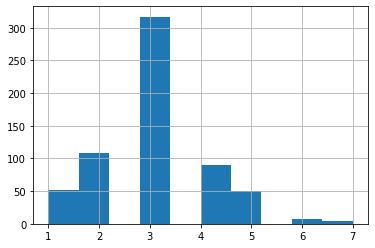

In [23]:
df["IDS"] = df["IN FILE"].str.split("-").apply(lambda x: x[2]).str.replace(".wav", "").astype(int)
df.groupby(by="MANUAL ID")["IDS"].nunique().hist()

In [29]:
data = df.groupby(by="MANUAL ID")["IDS"].nunique().to_frame()


,IDS
MANUAL ID,
Actitis-macularius,4
Adelomyia-melanogenys,3
Aeronautes-montivagus,6
Agamia-agami,3
Aglaiocercus-kingii,3
...,...
Xiphorhynchus-triangularis,4
Zebrilus-undulatus,3
Zenaida-auriculata,3


In [75]:
df.groupby(by="MANUAL ID")["IDS"].nunique()

MANUAL ID
Actitis-macularius            4
Adelomyia-melanogenys         3
Aeronautes-montivagus         6
Agamia-agami                  3
Aglaiocercus-kingii           3
                             ..
Xiphorhynchus-triangularis    4
Zebrilus-undulatus            3
Zenaida-auriculata            3
Zimmerius-cinereicapilla      3
Zonotrichia-capensis          3
Name: IDS, Length: 630, dtype: int64

In [95]:
bar = df.groupby(by="MANUAL ID")["IDS"].nunique()#.to_frame().reset_index()
#bar["IDS"] = bar["IDS"].astype(str)
bar

MANUAL ID
Actitis-macularius            4
Adelomyia-melanogenys         3
Aeronautes-montivagus         6
Agamia-agami                  3
Aglaiocercus-kingii           3
                             ..
Xiphorhynchus-triangularis    4
Zebrilus-undulatus            3
Zenaida-auriculata            3
Zimmerius-cinereicapilla      3
Zonotrichia-capensis          3
Name: IDS, Length: 630, dtype: int64

c:\Users\seanh\.conda\envs\species-id\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='IDS', ylabel='count'>

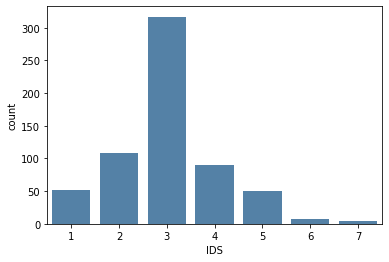

In [102]:
sns.countplot(bar, color="steelblue")

In [70]:
bar = df.groupby(by="MANUAL ID")["IDS"].nunique().value_counts().reset_index()
bar = bar.sort_values(by="index")
bar["index"] = bar["index"].astype(str)
bar

,index,IDS
3,1,52
1,2,108
0,3,317
2,4,90
4,5,50
5,6,8
6,7,5


In [74]:
sns.barplot(bar, x="index", y="IDS")

c:\Users\seanh\.conda\envs\species-id\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret input 'IDS'

c:\Users\seanh\.conda\envs\species-id\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\seanh\.conda\envs\species-id\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'AxesSubplot' object has no property 'figsize'

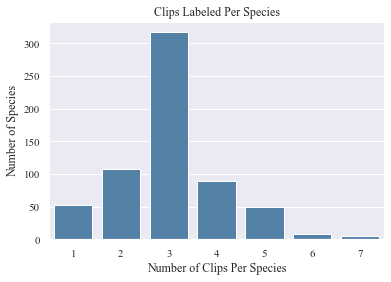

In [110]:
#https://www.statology.org/seaborn-axis-labels/

#ax =  sns.histplot(df.groupby(by="MANUAL ID")["IDS"].nunique(), bins=6)
sns.set_theme(font_scale=1.5, font="Times New Roman")
df = pd.read_csv("C:/Users/seanh/Desktop/E4E/sustech_paper_2024/manual_pre.csv")
df["IDS"] = df["IN FILE"].str.split("-").apply(lambda x: x[2]).str.replace(".wav", "").astype(int)
bar = df.groupby(by="MANUAL ID")["IDS"].nunique()
ax = sns.countplot(bar, color="steelblue")
ax.set(xlabel='Number of Clips Per Species',
       ylabel='Number of Species',
       title='Clips Labeled Per Species',
       figsize=(10, 8))


In [18]:
df

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME,FOLDER,IDS
0,Actitis-macularius-257516.wav,21.7600,6.5711,1.0000,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/,257516
1,Actitis-macularius-257516.wav,21.7600,1.7911,0.5400,24000,0,44100,Actitis-macularius,4935.930,alarce,11/22/2021,03:18:44,./Mixed_Bird/,257516
2,Actitis-macularius-257516.wav,21.7600,14.6511,0.6200,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/,257516
3,Actitis-macularius-257516.wav,21.7600,9.1711,0.8900,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/,257516
4,Actitis-macularius-257516.wav,21.7600,5.0511,0.6500,24000,0,44100,Actitis-macularius,4935.940,alarce,11/22/2021,03:18:44,./Mixed_Bird/,257516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,Zonotrichia-capensis,623.174,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/,232609
24501,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,Zonotrichia-capensis,623.135,JacobGlennAyers,10/10/2021,02:06:40,./Mixed_Bird/,232609
24502,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,Zonotrichia-capensis,229.527,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/,377483
24503,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,Zonotrichia-capensis,229.543,JacobGlennAyers,10/18/2021,17:33:36,./Mixed_Bird/,377483
